# <center>3. Дерева рішень, метод найближчого сусіда та лінійні моделі</center>
## <center>3.2 Лінійні моделі</center>

### <center>3.2.1 Лінійна регресія

Спочатку налаштуємо доступ до даних на google drive (якщо ви відкриваєте блокнот в google colab, а не на PC) шляхом монтування google drive

In [17]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Перевіримо шлях до папки з матеріалами лаборатоної роботи на google drive. Якщо у вас шлях відрізняється то відредагуйте



In [ ]:
!ls gdrive/MyDrive/TEACHING/IntroDataScience/intro_to_data_science/Lec_topic_3

AI_quiсk_overview.pdf		      lec_3.1_trees_knn_eng.pdf
data				      lec_3.1_trees_knn.ipynb
data_science_08092022_ua_part_1.mp4   lec_3.1_trees_knn.pdf
data_science_20092022_eng_part_1.mp4  lec_3.2_linear_models_eng.ipynb
data_science_20092022_eng_part_2.mp4  lec_3.2_linear_models_eng.pdf
data_science_20092022_eng_part_3.mp4  lec_3.2_linear_models.ipynb
img				      lec_3.2_linear_models.pdf
lec_3.1_trees_knn_eng.ipynb


Перемістимо матеріали лабораторної роботи з google drive на віртуальну машину google colab


In [ ]:
!cp -a gdrive/MyDrive/TEACHING/IntroDataScience/intro_to_data_science/Lec_topic_3/. .
!ls

AI_quiсk_overview.pdf		      lec_3.1_trees_knn_eng.pdf
data				      lec_3.1_trees_knn.ipynb
data_science_08092022_ua_part_1.mp4   lec_3.1_trees_knn.pdf
data_science_20092022_eng_part_1.mp4  lec_3.2_linear_models_eng.ipynb
data_science_20092022_eng_part_2.mp4  lec_3.2_linear_models_eng.pdf
data_science_20092022_eng_part_3.mp4  lec_3.2_linear_models.ipynb
gdrive				      lec_3.2_linear_models.pdf
img				      sample_data
lec_3.1_trees_knn_eng.ipynb


### Метод найменших квадратів

Розповідь про лінійні моделі ми почнемо з лінійної регресії. В першу чергу, необхідно задати модель залежності пояснюваної змінної $y$ від пояснюючих її факторів, функція залежності буде лінійною: $y = w_0 + \sum_{i=1}^m w_i x_i$. Якщо ми додамо фіктивну розмірність $x_0 = 1$ для кожного спостереження, то лінійну форму можна переписати дещо більш компактно, записуючи вільний член $w_0$ під суму: $y = \sum_{i=0}^m w_i x_i = \textbf{w}^{\text{T}} \textbf{x}$. Якщо розглядати матрицю спостереження-ознаки, у якої в рядках знаходяться приклади з набору даних, то нам необхідно додати одиничну колонку зліва. Задамо модель наступним чином:

$$\large \textbf y = \textbf{X} \textbf w + \epsilon,$$

где
- $\textbf{y} \in \mathbb{R}^n$ – пояснювана (або цільова) змінна;
- $\textbf{w}\in \mathbb{R}^{m+1}$ – вектор параметрів моделі (в машинному навчанні ці параметри часто називають вагами);
- $\textbf{X}$ – матриця спостережень і ознак розмірності $n$ рядків на $m + 1$ стовбців (включаючи фіктивну одиничну колонку зліва) з повним рангом за стовбцями: $\text{rank}\left(\textbf{X}\right) = m$;
- $\epsilon$ – випадкова змінна, що відповідає випадковій, непрогнозованій помилці моделі.

Можемо виписати вираз для кожного конкретного спостереження

$$\large 
y_i = \sum_{j=0}^m w_j X_{ij} + \epsilon_i$$

Також на модель накладаються наступні обмеження (інакше це буде якась інша регресія, але точно не лінійна):
- маточікування випадкових помилок рівне нулю: $\forall i: \mathbb{E}\left[\epsilon_i\right] = 0$;
- дисперсія випадкових помилок однакова і кіцева, ця властивість називається гомоскедастичностью: $\forall i: \text{Var}\left(\epsilon_i\right) = \sigma^2 < \infty$;
- випадкові помилки не корельовані: $\forall i \neq j: \text{Cov}\left(\epsilon_i, \epsilon_j\right) = 0$.

Оцінка $\widehat{w}_i$ ваг $w_i$ називається *лінійна*, якщо

$$\large \widehat{w}_i = \omega_{1i}y_1 + \omega_{2i}y_2 + \cdots + \omega_{1n}y_n,$$

де $\forall\ k\ \omega_{ki}$ залежить тільки від спостережуваних даних $\textbf{X}$ і скоріш за все нелінійно. Так як розвязком задачі пошуку оптимальних ваг буде саме лінійна оцінка, то і модель називається *лінійною регресією*. Введемо ще одне визначення. Оцінка $\widehat{w}_i$ називається *незміщеною* тоді, коли математичне очікування оцінки рівне реальному, але невідомому значенню оцінюваного параметра:

$$\large \mathbb{E}\left[\widehat{w}_i\right] = w_i$$

Один із способів обчислити значення параметрів моделі є <b>метод найменших квадратів</b> (МНК), який мінімізує середньоквадратичну помилку між реальним значенням залежної змінної і прогнозом, що видає модель:

$$\large \begin{array}{rcl}\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf{X} \textbf{w}\right)^{\text{T}} \left(\textbf{y} - \textbf{X} \textbf{w}\right)
\end{array}$$

Для рішення даної оптимізаційної задачі необхідно обчислити похідні по параметрам моделі, прирівняти їх до нуля і розв'язати отримане рівняння відносно $\textbf w$ (матричне диференціювання непідготованому читачу може видатися складним, спробуйте розписати все через суми, щоб впевнитися у звіті):

Підсказка щодо матричних похідних:


$$\large \begin{array}{rcl} 
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} &=& \textbf{A} \\
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} \textbf{X} &=& \left(\textbf{A} + \textbf{A}^{\text{T}}\right)\textbf{X} \\
\frac{\partial}{\partial \textbf{A}} \textbf{X}^{\text{T}} \textbf{A} \textbf{y} &=&  \textbf{X}^{\text{T}} \textbf{y}\\
\frac{\partial}{\partial \textbf{X}} \textbf{A}^{-1} &=& -\textbf{A}^{-1} \frac{\partial \textbf{A}}{\partial \textbf{X}} \textbf{A}^{-1} 
\end{array}$$

Продовжимо:

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right)
\end{array}$$

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

Ітак, маючи на увазі всі визначення і умови описані вище, ми можемо стверджувати, опираючись на теорему Маркова-Гаусса</a>, що оцінка МНК є кращою оцінкою параметрів моделі, серед всіх <i>лінійних</i> і <i>незміщених</i> оцінок, тобто характеризується найменшою дисперсією.

### Метод максимальної правдоподібності

У Вас можуть виникнути питання: наприклад, чому ми мінімізуємо середньоквадратичну помилку, а нещось інше. Адже можна мінімізувати середнє абсолютне значення невязки чи ще щось. Єдине, що виникне у випадку зміни мінімізуючого значення, так це вихід із умов теореми Маркова-Гауса і наші оцінки перестануть бути кращими серед лінійних і незміщених. 

Давайте перед тим як продовжувати, зробимо деякий вступ, щоб проілюструвати метод максимальної правдоподібності на простому прикладі. 

Якось після школи я помітив, що всі пам'ятають формулу етилового спирту. Тоді я вирішив провести експеримент: чи пом'ятають люди більш просту формулу метилового спирту: $CH_3OH$. Ми опитали 400 людей і виявилося, що формулу пам'ятають всього 117 людей. Розумно припустити, що ймовірність того, що наступний опитаний знає формулу метилового спирту – $\frac{117}{400} \approx 29\%$. Покажемо, що така інтуїтивно зрозуміла оцінка не просто хороша, а ще і є оцінкою максимальної правдоподібності. 

Розберемося, звідки береться ця оцінка, а для цього згадаємо визначення <a href="https://uk.wikipedia.org/wiki/%D0%A0%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB_%D0%91%D0%B5%D1%80%D0%BD%D1%83%D0%BB%D0%BB%D1%96">розподіл Бернулі</a>: випадкова величина $X$ має розподіл Бернулі, якщо вона приймає всього два значення ($1$ і $0$ з ймовірностями $\theta$ і $1 - \theta$ відповідно) і має наступну функцію розподілу ймовірності:

$$\large p\left(\theta, x\right) = \theta^x \left(1 - \theta\right)^\left(1 - x\right),~x \in \left\{0, 1\right\}$$

Схожу, цей розподіл – те, що нам потрібно, а параметр розподілу $\theta$ і є та оцінка ймовірності того, що людина знає формулу метилового спирту. Ми виконали $400$ <i>незалежних</i> експериментів, позначимо їх результати як $\textbf{x} = \left(x_1, x_2, \ldots, x_{400}\right)$. Запишемо *правдоподібність* наших даних (спостепрежень), тобто ймовірність спостереження 117 реалізацій випадкової величини $X = 1$ і 283 реализації  $X = 0$:

$$\large p(\textbf{x}; \theta) = \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = \theta^{117} \left(1 - \theta\right)^{283}$$

Далі будемо максимізувати цей вираз за $\theta$, і як правило це роблять не з правдоподібністю $p(\textbf{x}; \theta)$, а з його логарифмом (застосування монотонного перетворення не змінить рішення, але спростить обчислення):

$$\large \log p(\textbf{x}; \theta) = \log \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = $$
$$ \large = \log \theta^{117} \left(1 - \theta\right)^{283} =  117 \log \theta + 283 \log \left(1 - \theta\right)$$

Тепер ми хочему знайти таке значення $\theta$, яке максимізує правдоподібність, для цього ми візьмемо похідну за $\theta$, прирівняємо до нулю і вирішимо отримане рівняння:

$$\large  \frac{\partial p(\textbf{x}; \theta)}{\partial \theta} = \frac{\partial}{\partial \theta} \left(117 \log \theta + 283 \log \left(1 - \theta\right)\right) = \frac{117}{\theta} - \frac{283}{1 - \theta};$$


$$\large \begin{array}{rcl} 
\frac{117}{\theta} - \frac{283}{1 - \theta} = 0 \Rightarrow \theta = \frac{117}{400}
\end{array}.$$

Виходить, що наша інтуїтивна оцінка – це і є оцінка максимальної правдоподібності.  Застосуємо тепер те саме судження для задачі лінійної регресії і спробуємо з'ясувати, що стоїть за середньоквадратичною помилкою. Для цього нам доведеться подивитися на лінійну регресію з ймовірнісної точки зору. Модель, звісно, залишається такою ж:

$$\large \textbf y = \textbf X \textbf w + \epsilon,$$

але будемо тепер вважати, що випадкові помилки беруться з центрованого  <a href="https://uk.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB"> нормального розподілу </a>:

$$\large \epsilon_i \sim \mathcal{N}\left(0, \sigma^2\right)$$

Перепишемо модель з урахуванням вище описаного:

$$\large \begin{array}{rcl} 
y_i &=& \sum_{j=0}^m w_j X_{ij} + \epsilon_i \\
&\sim& \sum_{j=0}^m w_j  X_{ij} + \mathcal{N}\left(0, \sigma^2\right) \\
p\left(\textbf{y} \mid \textbf X; \textbf{w}\right) &=& \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right)
\end{array}$$

Оскільки приклади беруться незалежно (помилки не корелюють – одна з умов теореми Маркова-Гауса), то повна правдоподібність даних буде виглядати як добуток функцій щільності $p\left(y_i\right)$. Розглянемо логарифм правдоподібності, що дозволить нам перейти від добутку до суми:

$$\Large \begin{array}{rcl} 
\log p\left(\textbf{y} \mid \textbf X; \textbf{w}\right) &=& \log \prod_{i=1}^n \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right) \\
&=& \sum_{i=1}^n \log \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right) \\
&=& -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2
\end{array}$$

Ми хочемо знайти гіпотезу максимальної правдоподібності, тобто нам потрібно максимізувати вираз $p\left(\textbf{y} \mid \textbf X; \textbf{w}\right)$ за вектором $\textbf w$, отримуючи при цьому $\textbf{w}_{\text{ML}}$. Зверніть увагу, що під час максимізації функції за будь-яким параметром можна викинути всі члени, що не залежать від цього параметра:

$$\Large \begin{array}{rcl} 
\textbf{w}_{\text{ML}} &=& \arg \max_{\textbf w} p\left(\textbf{y}\mid \textbf X; \textbf{w}\right) = \arg \max_{\textbf w} \log p\left(\textbf{y}\mid \textbf X; \textbf{w}\right)\\
&=& \arg \max_{\textbf w} -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=& \arg \max_{\textbf w} -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=&  \arg \max_{\textbf w} \mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right)
\end{array}$$

Таким чином, ми побачимо, що максимізація правдоподібності даних – це те ж саме, що й мінімізація середньоквадратичної помилки (за умов справедливості вказаних вище припущень). Виходить, що саме така функція вартості є наслідком того, що помилка розподілена нормально, а не якось по-іншому.

### Разкладання помилки на зміщення і розкид (Bias-variance decomposition)

Поговоримо про властивості оцінки, отриманої лінійної регресії. В світлі попереднього пункту ми з'ясували, що:
- істинне значення цільової змінної складається з деякої детермінованої функції $f(\textbf{x})$ і випадкової помилки $\epsilon$: $y = f\left(\textbf{x}\right) + \epsilon$;
- помилка розподілена нормально з центром в нулі і деяким розкидом: $\epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$;
- істинне значення цільової змінної теж розподілене нормально: $y \sim \mathcal{N}\left(f\left(\textbf{x}\right), \sigma^2\right)$
- ми намагаємося наблизити детерміновану, але невідому функцію $f\left(\textbf{x}\right)$ лінійною функцією від регресорів $\widehat{f}\left(\textbf{x}\right)$, яка, у свою чергу, є точковою оцінкою функції $f$ в просторі функцій (точніше, ми обмежили простір функцій параметричним сімейством лінійних функцій), тобто випадковою змінною, у якій є середнє значення і дисперсія.

Тоді помилка в точці $\textbf{x}$ розкладається наступним чином:

$$\large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\left(\widehat{f}\left(\textbf{x}\right)\right)^2\right] - 2\mathbb{E}\left[y\widehat{f}\left(\textbf{x}\right)\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\widehat{f}^2\right] - 2\mathbb{E}\left[y\widehat{f}\right] \\
\end{array}$$

Для наглядності опустимо позначення аргумента функцій. Розглянемо кожен член окремо, перші два розписуються легко по формулі $\text{Var}\left(z\right) = \mathbb{E}\left[z^2\right] - \mathbb{E}\left[z\right]^2$:

$$\large \begin{array}{rcl} 
\mathbb{E}\left[y^2\right] &=& \text{Var}\left(y\right) + \mathbb{E}\left[y\right]^2 = \sigma^2 + f^2\\
\mathbb{E}\left[\widehat{f}^2\right] &=& \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 \\
\end{array}$$

Пояснення:

$$\large \begin{array}{rcl} 
\text{Var}\left(y\right) &=& \mathbb{E}\left[\left(y - \mathbb{E}\left[y\right]\right)^2\right] \\
&=& \mathbb{E}\left[\left(y - f\right)^2\right] \\
&=& \mathbb{E}\left[\left(f + \epsilon - f\right)^2\right] \\
&=& \mathbb{E}\left[\epsilon^2\right] = \sigma^2
\end{array}$$

$$\large \mathbb{E}[y] = \mathbb{E}[f + \epsilon] = \mathbb{E}[f] + \mathbb{E}[\epsilon] = f$$

І тепер останній член суми. Ми пом'ятаємо, що помилка і цільова змінна незалежні одна від одної:

$$\large \begin{array}{rcl} 
\mathbb{E}\left[y\widehat{f}\right] &=& \mathbb{E}\left[\left(f + \epsilon\right)\widehat{f}\right] \\
&=& \mathbb{E}\left[f\widehat{f}\right] + \mathbb{E}\left[\epsilon\widehat{f}\right] \\
&=& f\mathbb{E}\left[\widehat{f}\right] + \mathbb{E}\left[\epsilon\right] \mathbb{E}\left[\widehat{f}\right]  = f\mathbb{E}\left[\widehat{f}\right]
\end{array}$$

Нарешті, збираємо все разом:

$$\large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 - 2f\mathbb{E}\left[\widehat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\widehat{f}\right]\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\widehat{f}\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2
\end{array}$$

Ітак, ми досягаємо цілі всіх обчислень, описаних вище, остання формула говорить нам, що помилка прогнозу будь-якої моделі виду $y = f\left(\textbf{x}\right) + \epsilon$ складається з:

- квадрату зміщення: $\text{Bias}\left(\widehat{f}\right)$ – середня помилка за будь-яким набором даних;
- дисперсії: $\text{Var}\left(\widehat{f}\right)$ – варіативність помилки, тобто, на скільки помилка буде відрізнятися, якщо навчати модель на різних наборах даних;
- неусувна помилка: $\sigma^2$ – шум в даних.

Якщо з останньою ми нічого зробити не можемо, то на перші два доданки ми можемо якось вплинути. В ідеалі, звичайно ж, хотілося б звести до мінімуму обидва ці доданки (лівий верхній квадрат рисунку), але на практиці часто доводиться балансувати між зміщеними і нестабільними оцінками (висока дисперсія).



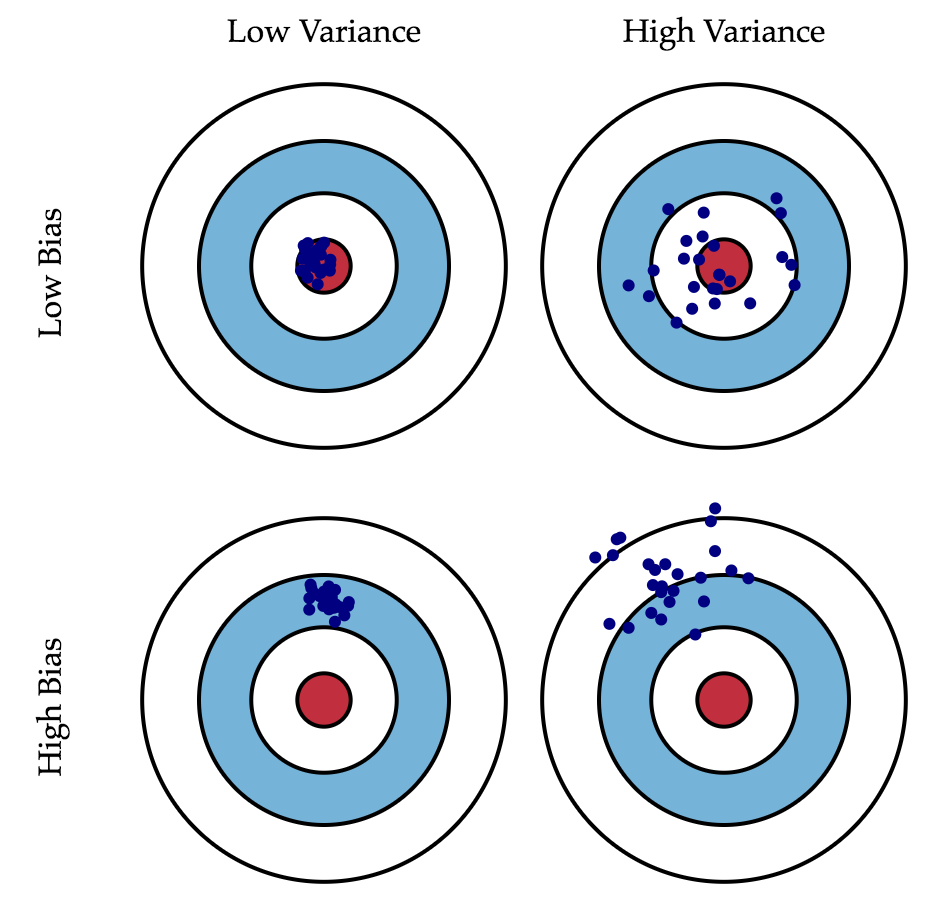

In [ ]:
from IPython.display import Image
Image('img/bvtf.png', width=640, height=480)


Як правило, при збільшенні складності моделі (наприклад, внаслідок збільшення кількості вільних параметрів) зменшується зміщення, але зростає дисперсія (розкид) оцінок. Із-за того що тренувальний набір даних повністю запам'ятовується замість узагальнення, невеликі зміни приводять до несподіваних результатів (перенавчання). Якщо ж модель слабка, то вона не в змозі вивчити закономірності, тому вивчається щось інше, зміщене відносно правильного рішення.



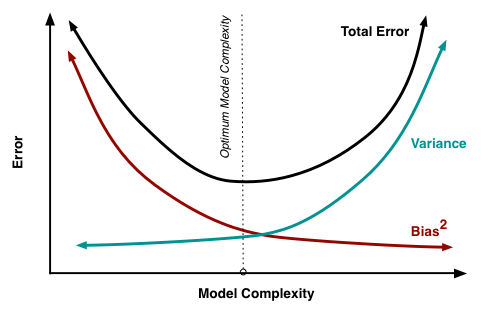

In [ ]:
from IPython.display import Image
Image('img/biasvariance.png', width=640, height=480)


Теорема Маркова-Гауса як раз стверджує, що МНК-оцінка параметрів лінійної моделі є найкращою в класі незміщених лінійних оцінок, тобто з найменшою дисперсією. Це означає, що якщо існує яка-небудь інша незміщена модель $g$ теж з класу лінійних моделей, то ми можемо бути впевнені, що $Var\left(\widehat{f}\right) \leq Var\left(g\right)$.

### Регуляризація лінійної регресії

Іноді бувають ситуації, коли ми навмисно збільшуємо зміщенність моделі заради її стабільності, тобто зараради зменшення дисперсії моделі $\text{Var}\left(\widehat{f}\right)$. Однією з умов теореми Маркова-Гауса є повний стовбцевий ранг матриці $\textbf{X}$. В протилежному випадку рішення МНК $\textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}$ не існує, оскільки не буде існувати обернена матрица $\left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1}.$ Іншими словами, матриця $\textbf{X}^{\text{T}} \textbf{X}$ буде вироджена. Такая задача називається <a href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BA%D1%82%D0%BD%D0%BE_%D0%BF%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0">некоректно поставленою</a>. Задачу потрібно зкоректувати, а саме, зробити матрицю $\textbf{X}^{\text{T}}\textbf{X}$ невиродженою, чи регулярною (саме тому цей процес називається регуляризацією). Частіше в даних ми можемо спостерігати так звану <i>мультиколінеарність</i> — коли дві чи декілька ознак сильно корельовані, в матриці $\textbf{X}$ це проявляється у вигдяді "майже" лінійною залежністю стовбців. Наприклад, в задачі прогнозування ціни квартири за її параметрами "майже" лінійна залежність буде в ознак "площа з врахуванням балкону" і "площа без врахування балкона". Формально для таких даних матриця $\textbf{X}^{\text{T}} \textbf{X}$ буде мати обернену матрицю, але із-за мультиколінеарності у матриці $\textbf{X}^{\text{T}} \textbf{X}$ деякі власні значення будуть близькі до нуля, а в оберненій матриці $\left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1}$ з'являться екстремально великі власні значення, оскільки власні значення оберненої матриці – це $\frac{1}{\lambda_i}$. Результатом такого коливання власних значень стане нестабільною оцінкою параметрів моделі, оскільки додавання нового спостереження в наборі тренувальних даних приведе до цілком іншого рішення. Одним зі способів регуляризації є регуляризація Тихонова ( L2-регуляризація), яка в загальному вигляді виглядає як додавання нового члену до середньоквадратичної помилки: 

$$\Large \begin{array}{rcl} 
\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \left\|\Gamma \textbf{w}\right\|^2\\
\end{array}$$

Часто матриця Тихонова виражається як добуток деякого числа на одиничну матрицю: $\Gamma = \frac{\lambda}{2}  \textbf{E}$. В цьому випадку задача мінімізації середньоквадратичної помилки стає задачею з обмеженнями на $L_2$-норму. Якщо продиференціювати нову функцію вартості за параметрами моделі, прирівняти отриману функцію до нуля і виразити $\textbf{w}$, то ми отримаємо точне рішення задачі.

$$\Large \begin{array}{rcl} 
\textbf{w} &=& \left(\textbf{X}^{\text{T}} \textbf{X} + \lambda \textbf{E}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

Така регресія називається гребневою регресією (ridge regression). А гребнем є як раз діагональна матриця, яку ми додаємо до матриці $\textbf{X}^{\text{T}} \textbf{X}$, в результаті формується гарантовано регулярна матриця.



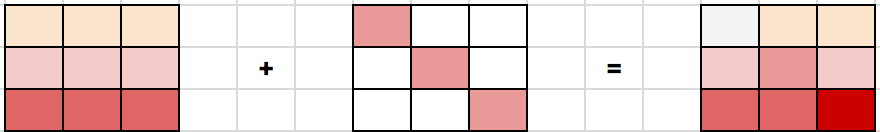

In [ ]:
from IPython.display import Image
Image('img/ridge.png', width=640, height=480)

Таке рішення зменшує дисперсію, але стає зміщеним, оскільки мінімізується також і норма вектора параметрів, що примушує рішення зрушити в сторону нуля. На рисунку нижче на перетині білих пунктирних ліній знаходяться МНК-рішення. Голубими точками позначені різні рішення гребневою регресією. Видно, що при збільшенні параметра регуляризації $\lambda$ рішення зрушиться в сторону нуля.



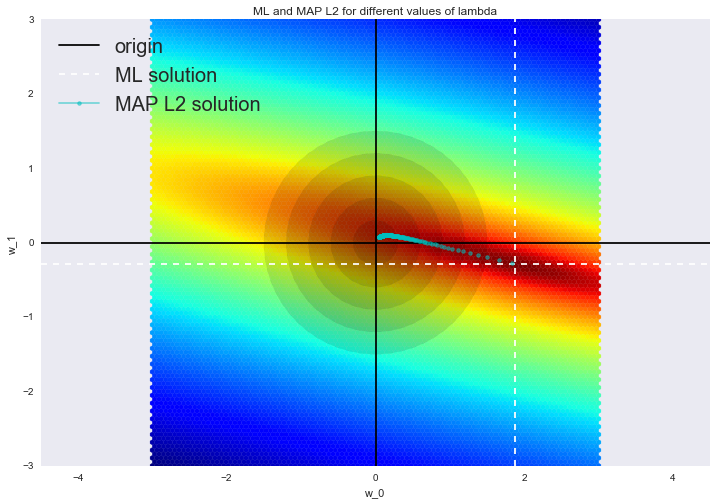

In [ ]:
from IPython.display import Image
Image('img/l2.png', width=640, height=480)

## <center>3.2.2 Логістична регресія і метод максимальної правдоподібності 

### Лінійний класифікатор

Основна ідея лінійного класифікатора полягає в тому, що ознаковий простір може бути розділений гіперплощиною на дві напівплощини, в кожній з яких прогнозується одне з двох значень цільового класу. 
Якщо це можна зробити без помилок, то навчальна вибірка називається *лінійно розділимою*.



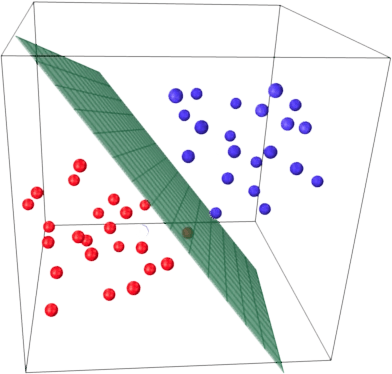

In [ ]:
from IPython.display import Image
Image('img/logit.png', width=640, height=480)


Ми вже знайомі з лінійною регресією і методом найменших квадратів. Розглянемо задачу бінарної класифікації, причому мітки цільового класу позначимо "+1" (додатні приклади) і "-1" (від'ємні приклади).
Один з самих простих лінійних класифікаторів побудований на основі регресії ось таким чином:

$$\Large a(\textbf{x}) = \text{sign}(\textbf{w}^{\text{T}}\textbf x),$$

где
 - $\textbf{x}$ – вектор ознак прикладу (разом з одиницею);
 - $\textbf{w}$ – ваги в лінійній моделі (разом зі зміщенням $w_0$);
 - $\text{sign}(\bullet)$ – функція "сигнум", що повертає знак свого аргумента;
 - $a(\textbf{x})$ – відповідь класифікатора на прикладі $\textbf{x}$.

Логістична регресія є частинним випадком лінійного класифікатора, але вона характеризується хорошим "вміння" – прогнозувати ймовірність $p_+$ віднесення прикладу $\textbf{x}_\text{i}$ к классу "+":
$$\Large p_+ = \text P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

Прогнозування не просто відповіді ("+1" или "-1"), а саме *ймовірності* віднесення до класу "+1" в багатьох задачах є дуже важливою бізнес-вимогою. Наприклад, в задачі кредитного скорингу, де традиційно застосовується логістична регресія, часто прогнозують ймовірність неповернення кредиту ($p_+$). Клієнтів, що звернулися за кредитом, сортують за цією пронозованою ймовірністю (за спаданням), і формується скоркарта — по суті, рейтинг клієнтів від поганих до хороших. Нижче приведено іграшковий приклад такої скоркарти. 


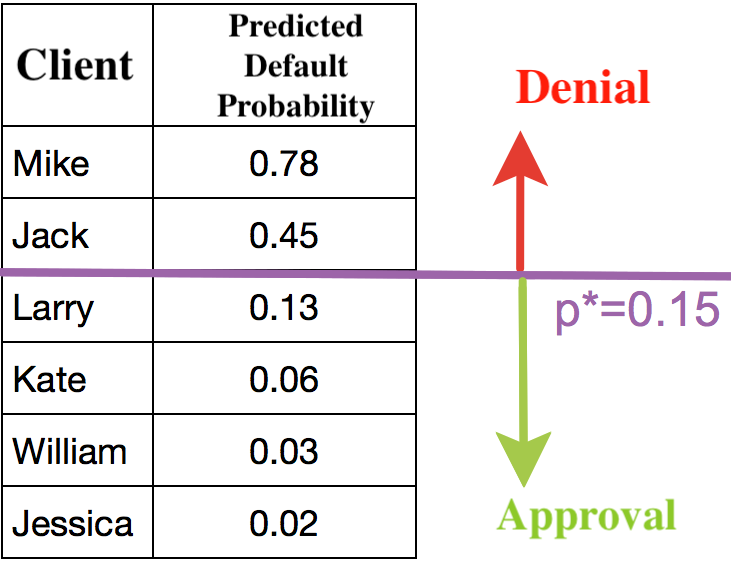

In [ ]:
from IPython.display import Image
Image('img/toy_scorecard_eng.png', width=640, height=480)

Банк вибирає для себе поріг $p_*$ прогнозованої ймовірності неповернення кредиту (на картинці – $0.15$) і починаючи з цього значення вже не видає кредит. Більш того, можна помножити прогнозовану ймовірність на видану суму і отримати математичне очікування втрат з клієнта, що теж буде хорошою бізнес-метрикою.

Ми хочемо прогнозувати ймовірність $p_+ \in [0,1]$, а поки маємо будувати лінійний прогноз за допомогою МНК: $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$. Яким чином, перетворювати отримані значення у ймовірність, межі якої – [0, 1]? Очевидно, для цього потрібна деяка функція $f: \mathbb{R} \rightarrow [0,1].$ В моделі логістичної регресії для цього береться конкретна функція: $\sigma(z) = \frac{1}{1 + \exp^{-z}}$. І зараз розберемося, які для цього передумови. 

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def sigma(z):
    return 1. / (1 + np.exp(-z))

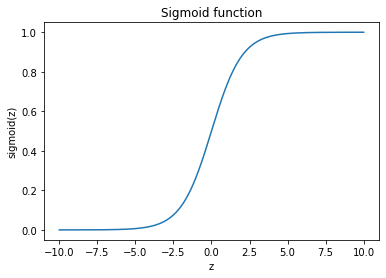

In [ ]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx]);
plt.xlabel('z');
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid function');

Позначимо $P(X)$ ймовірністю подій, що відбувається, $X$. Тоді відношення ймовірностей $OR(X)$ визначається з $\frac{P(X)}{1-P(X)}$, а це — відношення ймовірностей того, чи відбудеться подія чи не відбудеться. Очевидно, що ймовірність і відношення шансів містить однакову інформацію. Проте в той час як $P(X)$ знаходиться в межах від 0 до 1, $OR(X)$ знаходится в межах від 0 до $\infty$.

Якщо обчислити логарифм $OR(X)$ (називається логарифм шансів, чи логарифм відношення ймовірностей), то легко помітити, що $\log{OR(X)} \in \mathbb{R}$. Саме його ми і будемо прогнозувати за допомогою МНК.

Поглянемо, як логістична регресія буде робити прогноз $p_+ = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$ (доки вважаємо, що ваги $\textbf{w}$ ми якось отримали (тобто навчили модель), далі розберемося, як саме). 

**Шаг 1.** Обчислити значення $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}$. (рівння $\textbf{w}^\text{T}\textbf{x} = 0$ задає гіперплощину, що розділяє приклади на 2 класи);


**Шаг 2.** Обчислити логарифм відношення шансів: $ \log(OR_{+}) =  \textbf{w}^\text{T}\textbf{x}$.

**Шаг 3.** Маючи прогноз шансів на відношення до класу "+" – $OR_{+}$, обчислити $p_{+}$ за допомогою простої залежності:

$$\Large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} =  \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x})$$


В правій частині ми отриаємо як раз сигмоїд-функцію.

Логістична регресія прогнозує ймовірність віднесення прикладу до класу "+" (за умови, що ми знаємл його ознаки і ваги моделі) як сигмоїд-перетворення лінійної комбінації вектора ваг моделі і вектора ознак прикладу:

$$\Large p_+(x_i) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}). $$

Наступне питання: як модель навчається. Тут ми знову звертаємося до принципу максимальної правдоподібності.

### Принцип максимальної правдоподібності і логістична регресія
Тепер поглянемо, як з принципу максимальної правдоподібності формується оптимізаційна задача, яку вирішує логістична регресія, а саме, – мінімізація *логістичної* функції втрат. 
Тільки що ми побачили, що логістична регресія моделює ймовірність віднесення прикладу до класу "+" як 

$$\Large p_+(\textbf{x}_\text{i}) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Тоді для класу "-" аналогічна ймовірність:
$$\Large p_-(\textbf{x}_\text{i})  = \text{P}\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sigma(-\textbf{w}^\text{T}\textbf{x}_\text{i}) $$

Обидва ці вирази можна вправно поєднати в одне (слідкуйте за моїми руками – чи не обманюють вас):

$$\Large \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Вираз $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ називається *відступом* (*margin*) класифікації на об'єкті $\textbf{x}_\text{i}$ (не плутати з зазором (той же margin), про який частіще всього говорять в контексті SVM). Якщо він невід'ємний, модель не помиляється на об'єкті $\textbf{x}_\text{i}$, якщо ж від'ємний – означає, клас для $\textbf{x}_\text{i}$ прогнозований неправильно. 
Відмітимо, що відступ визначений для об'єктів саме навчальної вибірки, для яких відомі реальні мітки цільового класу $y_i$. 

Рекомендую розв'язати майже класичну задачу з початкового курсу лінійної алгебри: знайти відстань від точки з радіус-вектором $\textbf{x}_A$ до площини, яка задається рівнянням $\textbf{w}^\text{T}\textbf{x} = 0.$


Відповідь: 
$\Large \rho(\textbf{x}_A, \textbf{w}^\text{T}\textbf{x} = 0) = \frac{\textbf{w}^\text{T}\textbf{x}_A}{||\textbf{w}||}$

Коли отримаємо (або подивимося) відповідь, то зрозуміємо, що чим більше за модулем вираз $\textbf{w}^{\text{T}}\textbf{x}_\text{i}$, тим далі точка $\textbf{x}_\text{i}$ знаходиться від площини $\textbf{w}^{\text{T}}\textbf{x} = 0.$

Це означає, що вираз $M(\textbf{x}_\text{i}) = y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}$ – це свого роду "впевненість" моделі в класифікації объекта $\textbf{x}_\text{i}$: 

- якщо відступ більший (за модулем) і додатній, це означає, що мітка класу поставлена правильно, а об'єкт знаходиться далеко від роздільної гіперплощини (такий об'єкт класифікується впевнено). На рисунку – $x_3$.
- якщо відступ більший (за модулем) і від'ємний, це означає мітка, що класу поставлена неправильно, а об'єкт знаходиться далеко від роздільної гіперплощини (скоріш за все такий об'єкт – аномалія, наприклад, його мітка в навчальній вибіці поставлена неправильно). На рисунку – $x_1$.
- якщо відступ малий (за модулем), то об'єкт знаходиться близько до роздільної гіперплощини, а  знак відступу визначає, чи правильно об'єкт класифікований.  На рисунку – $x_2$ і $x_4$.

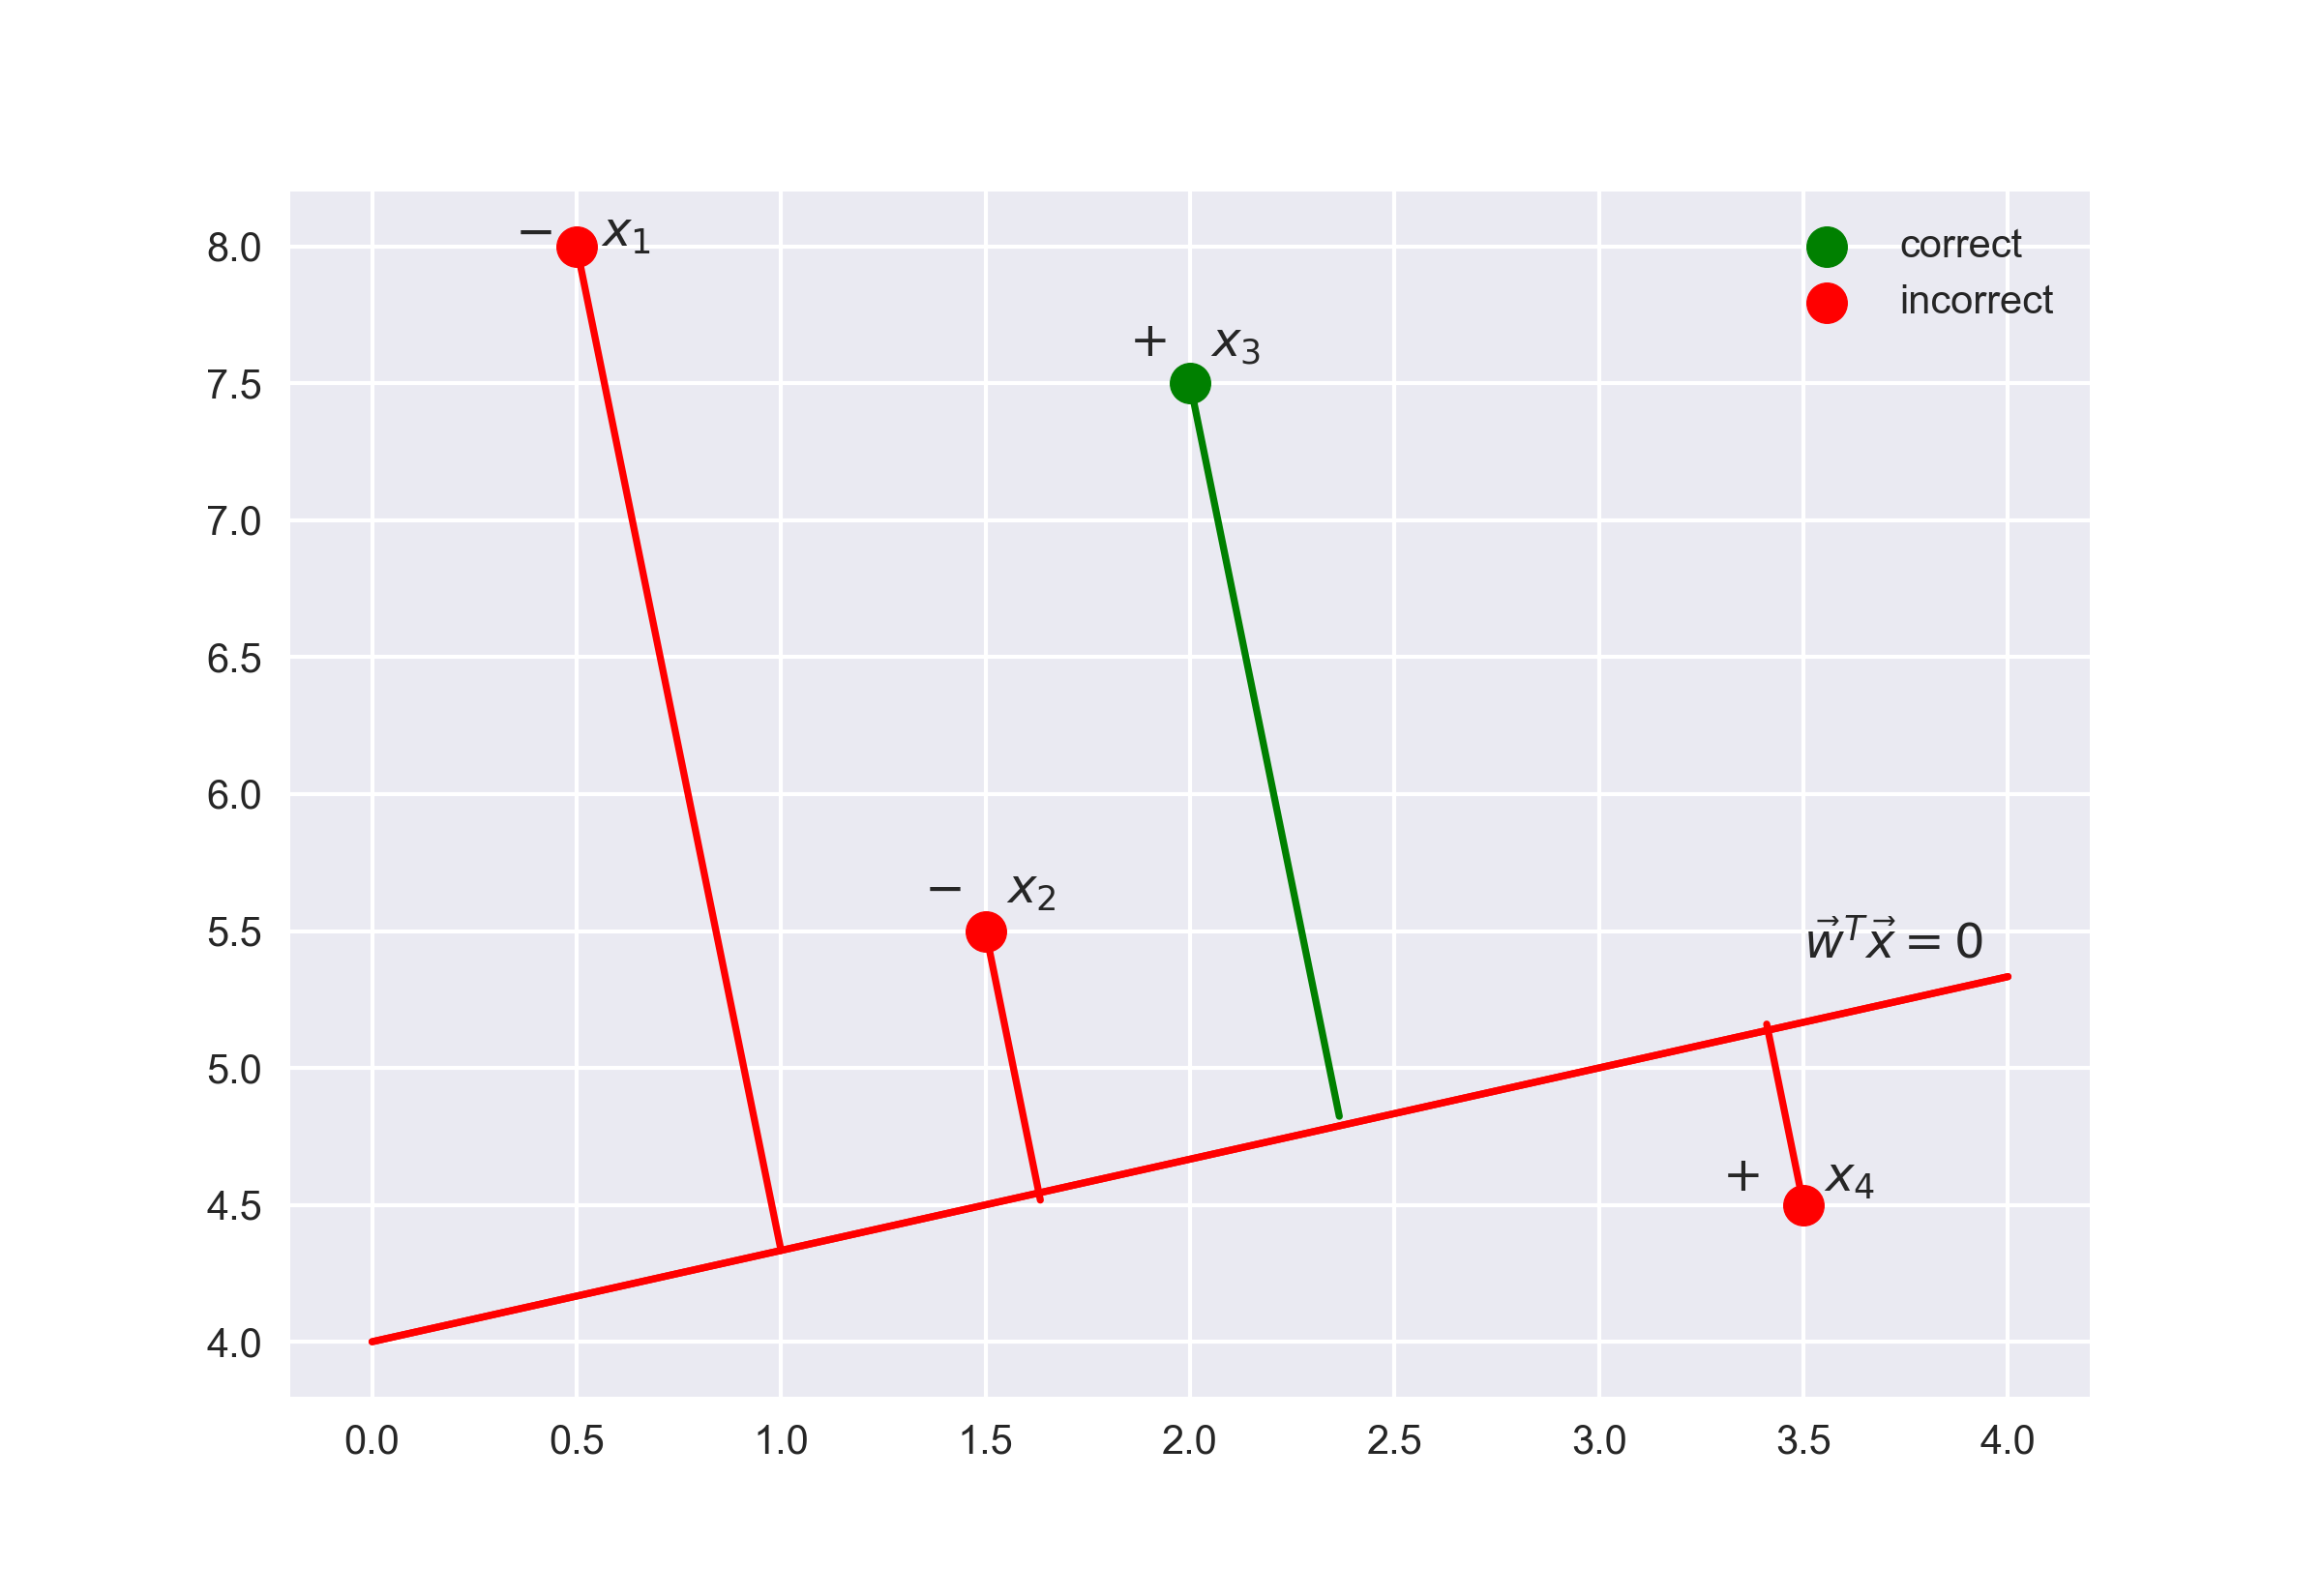

In [ ]:
from IPython.display import Image
Image('img/margin.png', width=640, height=480)

Тепер розпишемо правдоподібність вибірки, а саме, ймовірність спостерігати даний вектор $\textbf{y}$ у вибірці $\textbf X$. Робимо сильні припущення: об'єкти приходять незалежно, із одного розподілу (*i.i.d.*). Тоді

$$\Large \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \prod_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

де $\ell$ – довжина вибірки $\textbf X$ (число рядків).

Як водиться, візьмемо логарифм даного виразу (суму оптимізувати набагато простіше, ніж добуток):

$$\Large  \log \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \log \sum_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i})   = $$

$$\Large  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})$$

Тобто в даному випадку принцип максимізації правдоподібності приводить до мінімізації виразу 

$$\Large \mathcal{L_{log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}).$$

Це *логістична* функція втрат, просумована по всім об'єктам навчальної вибірки.

Подивимося на нову фунцію як на функцію від відступа: $L(M) = \log (1 + \exp^{-M})$. Намалюємо її графік, а також графік 1/0 функцією втрат (*zero-one loss*), яка просто штрафує модель на 1 за помилку на кожному об'єкті (відступ від'ємний): $L_{1/0}(M) = [M < 0]$.

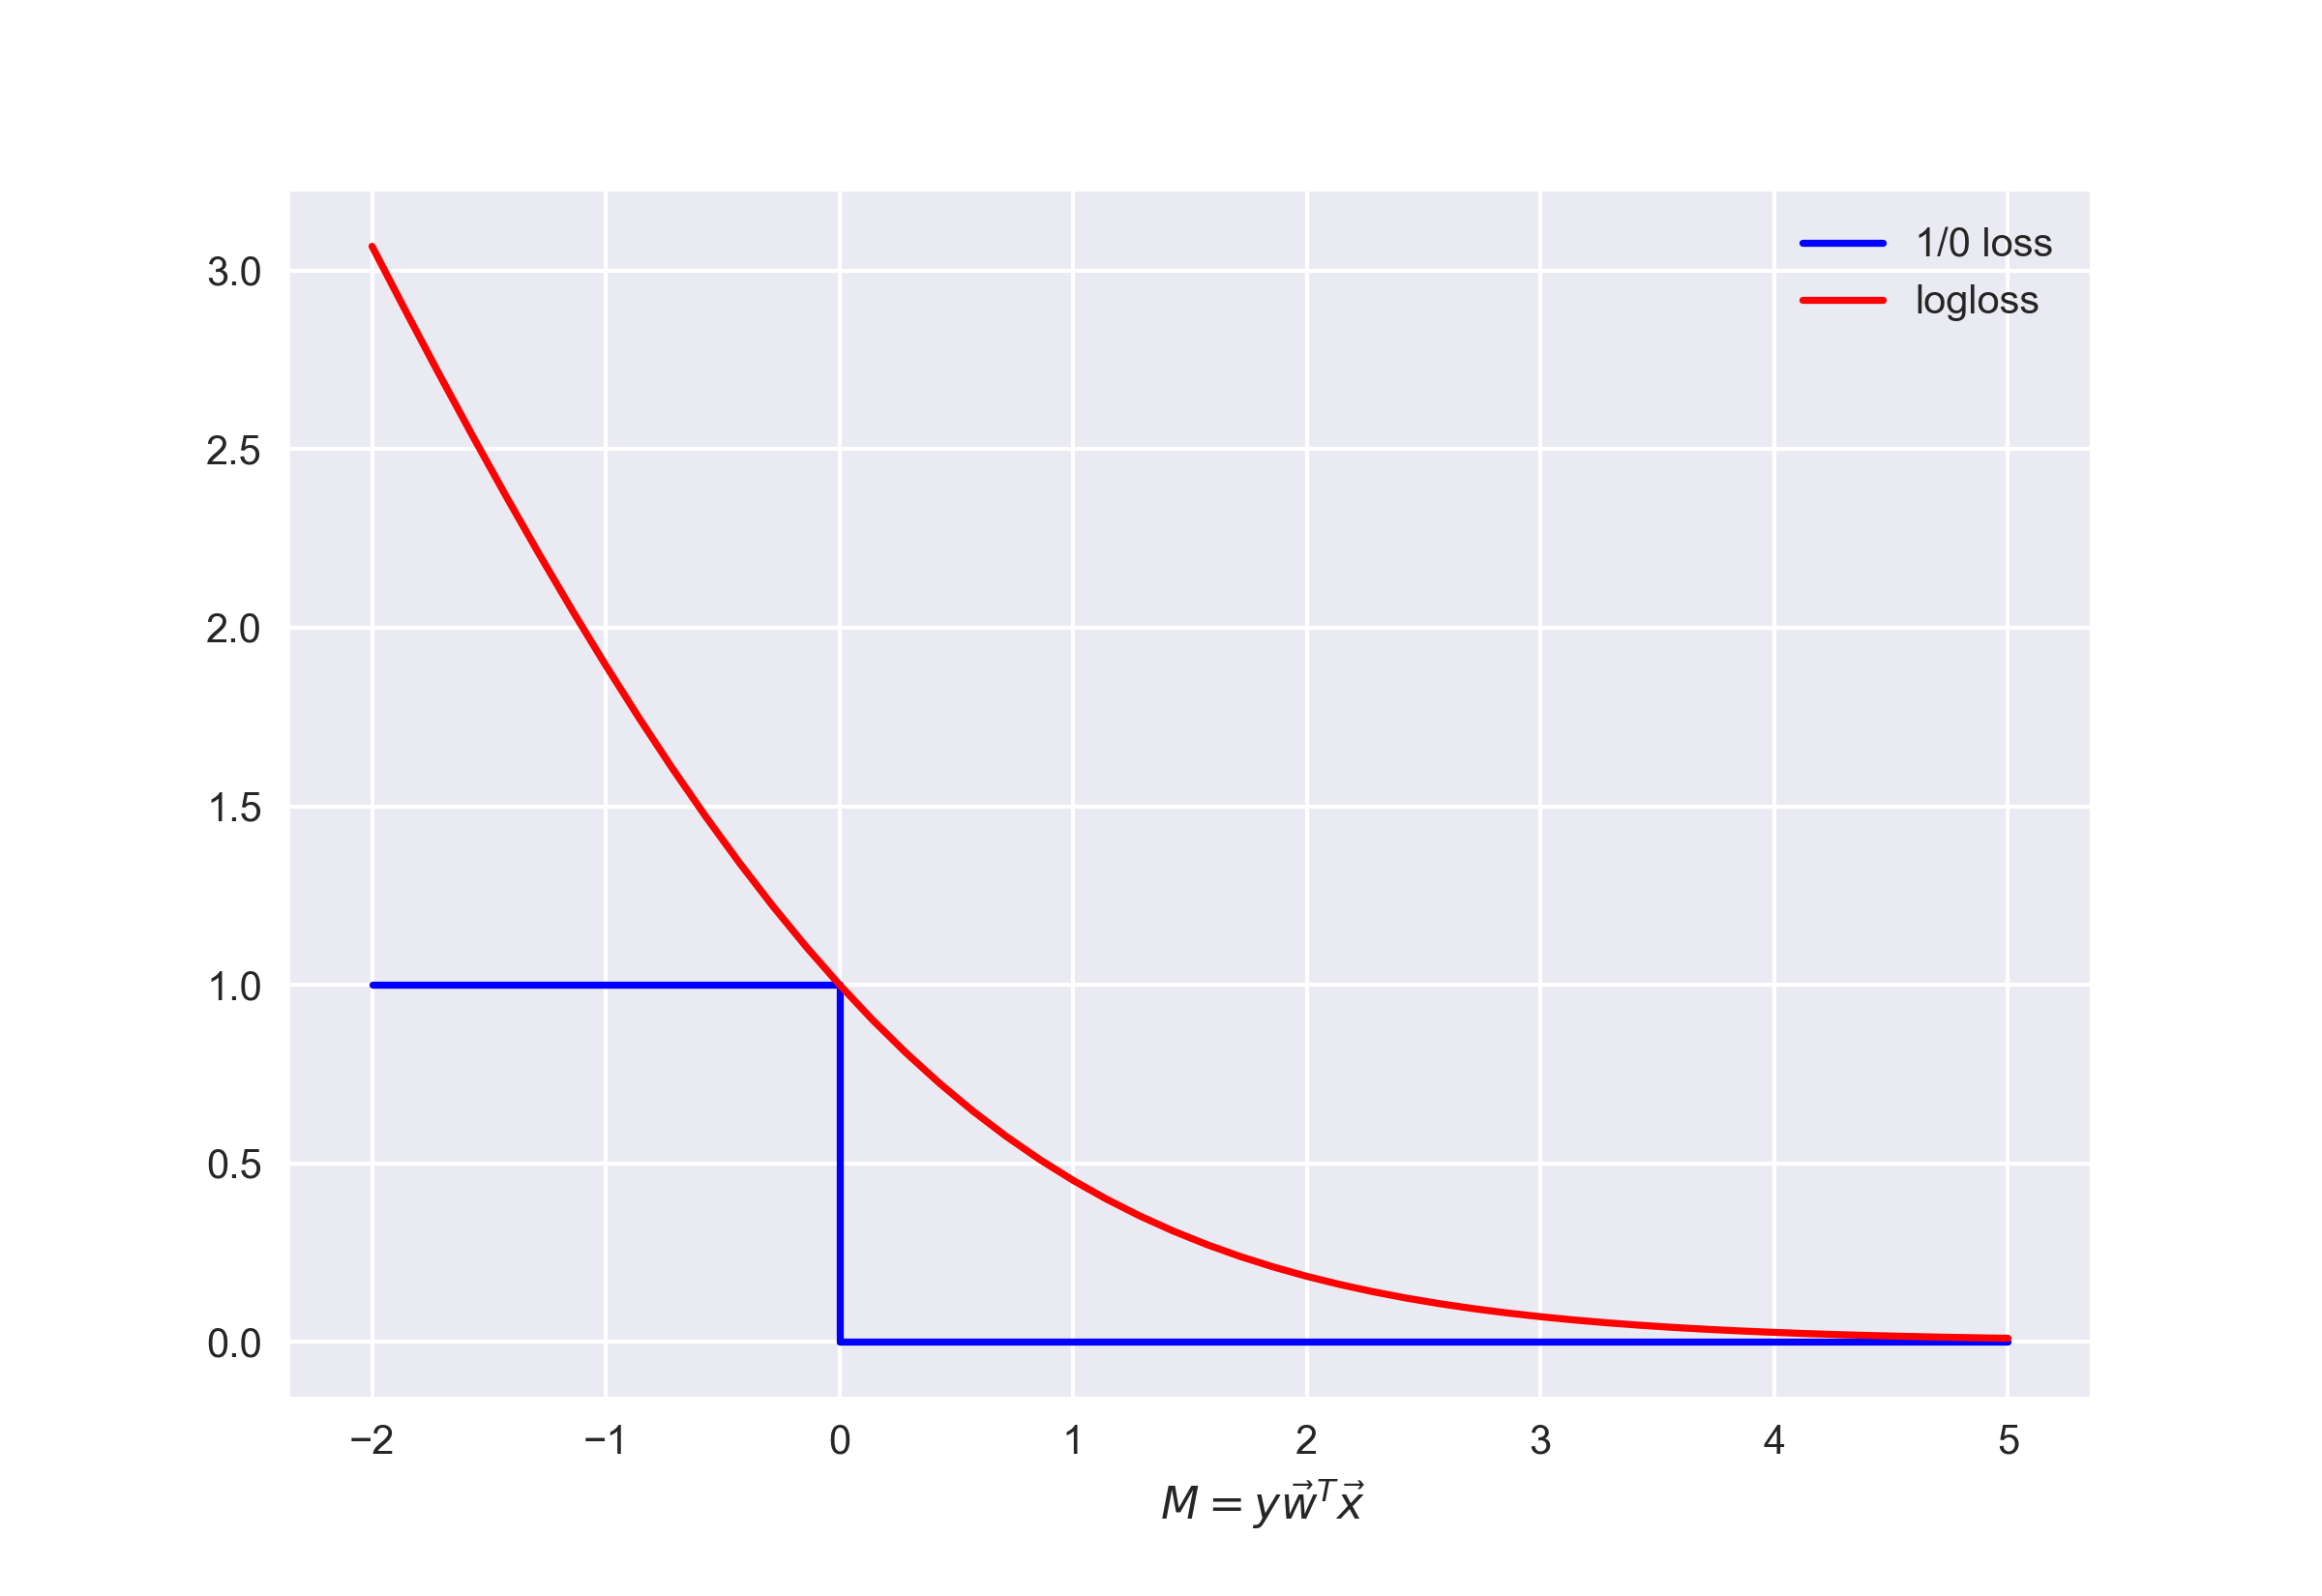

In [ ]:
from IPython.display import Image
Image('img/logloss_margin_eng.png', width=640, height=480)

Картинка відбиває загальну ідею, що в задачі класифікації, не вміючи напряму мінімізувати число помилок (градієнтними методами цього не зробити – похідна 1/0 функції втрат в нулі перетворюється в нескінченність), ми мінімізуємо деяку її верхню оцінку. В даному випадку це логістична функція втрат (де логарифм двійковий, але це не принципово), і справедливо 

$$\Large \mathcal{L_{\text{1/0}}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} [M(\textbf{x}_\text{i}) < 0] \leq \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}), $$

де $\mathcal{L_{\text{1/0}}} (\textbf X, \textbf{y}, \textbf{w})$ – попросту число помилок логістичної регресії з вагами $\textbf{w}$ на вибірці $(\textbf X, \textbf{y})$.

Тобто зменшуючи верхню оцінку $\mathcal{L_{\log}}$ на число помилок класифікації, ми таким чином маємо надію зменшити і само число помилок.

### L2-регуляризація логістичної функції втрат

$L2-регуляризація$ логістичної регресії влаштована майже так само, як і у випадку з гребневою (Ridge регресією). Замість функціоналу $\mathcal{L_{\log}} (X, \textbf{y}, \textbf{w})$ мінімізується наступний:

$$\Large J(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

У випадку логістичної регресії прийнято введення зворотного коефіцієнту регуляризації $C = \frac{1}{\lambda}$. І тоді розв'язання задачі буде

$$\Large \widehat{\textbf{w}}  = \arg \min_{\textbf{w}} J(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 

Далі розглянемо приклад, що дозволить інтуїтивно зрозуміти один із сенсів регуляризації. 

Спочатку налаштуємо доступ до даних на google drive (якщо ви відкриваєте блокнот в google colab, а не на PC) шляхом монтування google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


Перевіримо шлях до папки з матеріалами лаборатоної роботи на google drive.
Якщо у вас шлях відрізняється то відредагуйте


In [ ]:
!ls gdrive/MyDrive/TEACHING/IntroDataScience/intro_to_data_science/Lec_topic_3

AI_quiсk_overview.pdf		      lec_3.1_trees_knn_eng.pdf
data				      lec_3.1_trees_knn.ipynb
data_science_08092022_ua_part_1.mp4   lec_3.1_trees_knn.pdf
data_science_20092022_eng_part_1.mp4  lec_3.2_linear_models_eng.ipynb
data_science_20092022_eng_part_2.mp4  lec_3.2_linear_models_eng.pdf
data_science_20092022_eng_part_3.mp4  lec_3.2_linear_models.ipynb
img				      lec_3.2_linear_models.pdf
lec_3.1_trees_knn_eng.ipynb


Перемістимо матеріали лабораторної роботи з google drive на віртуальну машину google colab

In [ ]:
#!cp -a gdrive/MyDrive/TEACHING/IntroDataScience/intro_to_data_science/Lec_topic_3/. .
#!ls

Розглянемо, як регуляризація впливає на якість класифікації на наборі даних  тестування мікрочіпів. Будемо використовувати логістичну регресію з поліноміальними ознаками і варіювати параметр регуляризації C. Спочатку подивимося, як регуляризація впливає на роздільну межу класифікатора, інтуїтивно розпізнаємо перенавчання і недонавчання. Потім чисельно встановимо близький до оптимального параметр регуляризації за допомогою крос-валідації (cross-validation) і перебору по сітці (GridSearch).


Завантажуємо дані за допомогою методу `read_csv` бібліотеки` pandas`. У цьому наборі даних для 118 мікрочіпів (об'єкти) вказані результати двох тестів з контролю якості (дві числові ознаки) і сказано, чи пустили мікрочіп у виробництво. Ознаки вже центровані, тобто з усіх значень відняті середні по стовпцях. Таким чином, "середньому" мікрочіпу відповідає нульове значення результатів тестів.

In [18]:
from __future__ import division, print_function

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [20]:
# завантажеггя даних
data = pd.read_csv('data/microchip_tests.txt',
                   header=None, names = ('test1','test2','released'))
# інформація про набір даних
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


Переглянемо перші і останні 5 рядків.


In [21]:
data.head(5)

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [22]:
data.tail(5)

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


Збережемо навчальну вибірку і мітки цільового класу в окремих масивах NumPy.

In [ ]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

Відобразимо дані. Червоний колір відповідає бракованим чіпам, зелений – нормальним.  

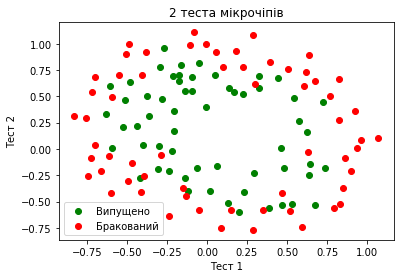

In [23]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Випущено')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракований')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста мікрочіпів')
plt.legend();

Визначаємо функцію для відображення роздільної кривої класифікатора


In [24]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))

    # кожній точці в сітці [x_min, m_max]x[y_min, y_max]
    # ставимо у відповідність свій колір
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

Поліноміальними ознаками до степеню $d$ для двох змінних $x_1$ та $x_2$ ми називаємо наступне:

$$\large \{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} =  \{x_1^ix_2^j\}_{i+j=d, i,j \in \mathbb{N}}$$

Наприклад, для $d=3$ це будуть наступні ознаки:

$$\large 1, x_1, x_2,  x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$$

Якщо  намалювати трикутник Піфагора, Ви зрозумієте, скільки таких ознак буде для $d=4,5...$ і взагалі для будь-якого $d$.
Простіше кажучи, таких ознак експоненційно багато, і будувати, скажімо, для 100 ознак поліноміальні степені 10 може виявитися затратно (а більш того, і не потрібно). 


Створимо об'єкт `sklearn`, який додасть в матрицю $X$ поліноміальні ознаки аж до степені '7.

In [25]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

In [26]:
X_poly.shape

(118, 36)

Навчимо логістичну регресію з параметром регуляризації 𝐶 = 10-2. Зобразимо розділяючу межу. Також перевіримо частку правильних відповідей класифікатора на навчальній вибірці. Бачимо, що регуляризація виявилася занадто сильною, і модель "недонавчилась".

Частка правильних відповідей класифікатора на навчальній вибірці: 0.627


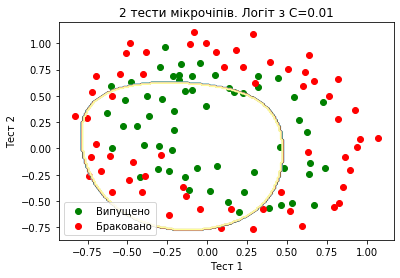

In [27]:
C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Випущено')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Браковано')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 тести мікрочіпів. Логіт з C=0.01')
plt.legend();

print("Частка правильних відповідей класифікатора на навчальній вибірці:", 
      round(logit.score(X_poly, y), 3))

Збільшимо $ C $ до 1. Тим самим ми * послаблюємо * регуляризацію, тепер в рішенні значення ваг логістичної регресії можуть виявитися більшими(за модулем), ніж в попередньому випадку.

Частка правильних відповідей класифікатора на навчальній вибірці: 0.831


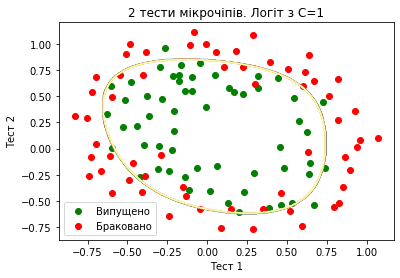

In [28]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Випущено')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Браковано')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 тести мікрочіпів. Логіт з C=1')
plt.legend();

print("Частка правильних відповідей класифікатора на навчальній вибірці:", 
      round(logit.score(X_poly, y), 3))

Ще збільшимо $ C $ - до 10 тисяч. Тепер регуляризації явно недостатньо, і ми спостерігаємо перенавчання. Можна помітити, що в попередньому випадку (при $ C $ = 1 і "гладкій" межі) частка правильних відповідей моделі на навчальній вибірці не набагато нижча, ніж в 3 випадку, зате на новій вибірці, можна собі уявити, 2 модель спрацює набагато краще.

Частка правильних відповідей класифікатора на навчальній вибірці: 0.873


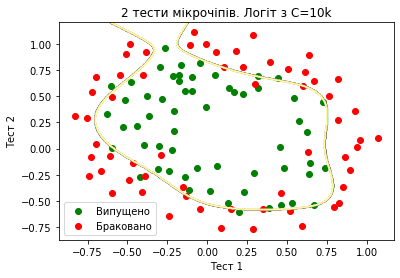

In [29]:
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Випущено')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Браковано')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 тести мікрочіпів. Логіт з C=10k')
plt.legend();

print("Частка правильних відповідей класифікатора на навчальній вибірці:", 
      round(logit.score(X_poly, y), 3))

Щоб обговорити результати, перепишемо формулу для функціонала, який оптимізується в логістичній регресії, в такому вигляді:
$$J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$$

де
 - $\mathcal{L}$ – логістична функція втрат, просумована за всією вибіркою
 - $C$ – звортний коефіцієнт регуляризації (той самий $C$ в `sklearn`-реалізації `LogisticRegression`)

** Проміжні висновки **:
 - чим більше значення параметру $ C $, тим складніші залежності в даних може відновлювати модель (інтуїтивно $ C $ відповідає "складності" моделі (model capacity))
 - якщо регуляризація занадто сильна (малі значення $ C $), то рішенням завдання мінімізації логістичної функції втрат може виявитися стан, коли багато ваг занулилися або стали занадто малими. Ще кажуть, що модель недостатньо "штрафується" за помилки (тобто в функціоналі $ J $ "переважує" сума квадратів ваг, а помилка $ \ mathcal {L} $ може бути відносно великою). В такому випадку модель виявиться * недонавченою * (1 випадок)
 - навпаки, якщо регуляризація занадто слабка (великі значення $ C $), то рішенням задачі оптимізації може стати вектор $ w $ з великими по модулю компонентами. В такому випадку більший внесок в оптимізаційний функціонал $ J $ має $ \ mathcal {L} $ і, вільно висловлюючись, модель занадто "боїться" помилитися на об'єктах навчальної вибірки, тому виявиться * перенавченою* (3 випадок)
 - яке саме значення $ C $ вибрати, сама логістична регресія "не зрозуміє" (або ще кажуть "не вивчить"), тобто це не може бути визначено рішенням оптимізаційної задачі, якою є логістична регресія (на відміну від ваг $ w $ ). Так само, дерево рішень не можуть "самі зрозуміти", яке обмеження на глибину вибрати (за один процес навчання). Тому $ C $ - це * гіперпараметр * моделі, який налаштовується на крос-валідації, як і * max_depth * для дерева.

Тепер знайдемо найкраще оптимальне (у даному прикладі) значення параметрів регуляризації $ C $. Зробити це можна за допомогою `LogisticRegressionCV` - перебору параметрів за сіткою з подальшою крос-валідацією. Цей клас створений спеціально для логістичної регресії (для невідомих ефективних алгоритмів перебору параметрів), для довільної моделі ми б використовували `GridSearchCV`,` RandomizedSearchCV` або, наприклад, спеціальні алгоритми оптимізації гіперпараметрів, реалізовані в `hyperopt`.

In [30]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.9s finished


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     n_jobs=-1, verbose=1)

In [31]:
logit_searcher.C_

array([150.78450459])

Подивимось, як якість моделі (частка правильних відповідей на навчальній і валідаційній вибірках) змінюється під час зміни гіперпараметра $C$. 

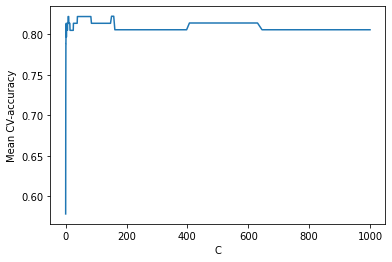

In [32]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

Виділимо ділянку з "найкращим" значенням C.


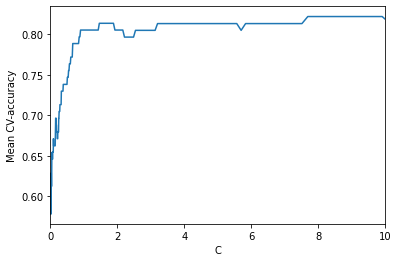

In [33]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,10));

Такі криві називаються *валідаційними*, і в `sklearn` для їх побудови є спеціальні методи.